PART-1

In [14]:
import numpy as np
import pandas as pd 

def underlying_function(x):
    return 20 * x * np.exp(-7 * x)

np.random.seed(42)
x = np.linspace(0, 1, 100)

t_true = underlying_function(x) 
t = t_true + np.random.normal(0, 0.5, size=x.shape)

train_indices = np.linspace(0, 99, 15, dtype=int) 
x_train = x[train_indices]
t_train = t[train_indices]

M_values = [1, 3, 5, 9, 11, 13, 15]

results = []

for M in M_values:
    Phi_train = np.vstack([x_train**m for m in range(M+1)]).T
    w_star = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train
    results.append((M, w_star))

df = pd.DataFrame(results, columns=["M (Polynomial Degree)", "w* (Weights)"])
df["w* (Weights)"] = df["w* (Weights)"].apply(lambda w: np.round(w, 3)) 

print(df)

   M (Polynomial Degree)                                       w* (Weights)
0                      1                                    [0.542, -0.771]
1                      3                     [0.655, -0.111, -4.639, 4.339]
2                      5      [0.386, 7.827, -44.378, 71.05, -38.72, 3.825]
3                      9  [0.265, 50.107, -864.247, 5872.081, -19564.193...
4                     11  [0.256, 267.632, -8207.852, 102340.61, -690071...
5                     13  [0.254, 217.359, -6309.042, 73769.163, -458695...
6                     15  [0.263, 261.833, -7802.401, 92404.835, -570058...


PART-2

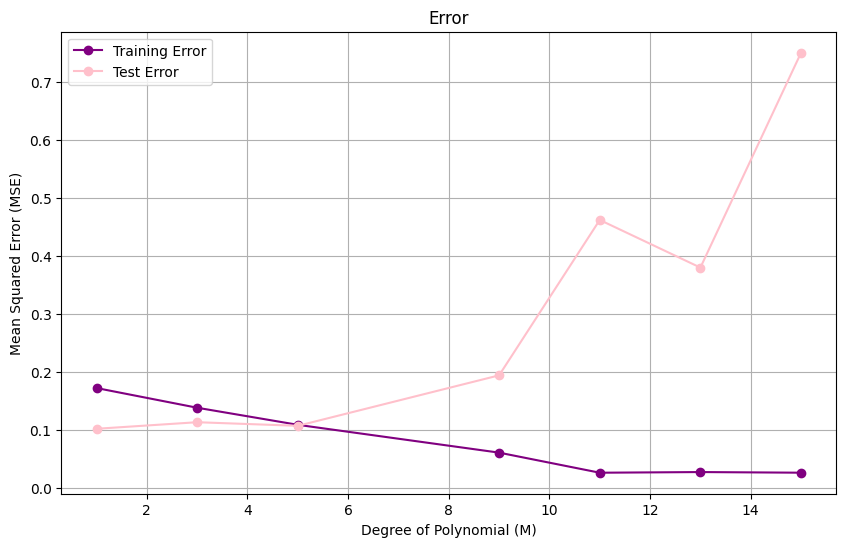

In [15]:
import matplotlib.pyplot as plt
def predict(Phi, w_star):
    return Phi @ w_star

def mean_squared_error(t_true, t_pred):
    return np.mean((t_true - t_pred) ** 2)

train_errors = []
test_errors = [] 

for M in M_values:
    Phi_train =np.vstack([x_train**m for m in range(M+1)]).T
    Phi_test = np.vstack([x**m for m in range(M+1)]).T
    
    w_star_ls = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train
    
    t_train_pred = Phi_train @ w_star_ls 
    t_test_pred = Phi_test @ w_star_ls    
    
    
    train_error =np.mean((t_train - t_train_pred) ** 2)
    test_error =np.mean((t_true - t_test_pred) ** 2)  
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6)) 
plt.plot(M_values, train_errors, label='Training Error', marker='o',color='purple') 
plt.plot(M_values, test_errors, label='Test Error', marker='o',color='pink')      
plt.xlabel('Degree of Polynomial (M)')  
plt.ylabel('Mean Squared Error (MSE)')  
plt.title('Error')  
plt.legend()  
plt.grid(True)
plt.show()  


PART-3

 M overfit : 9

Best alpha: 1.320e-06
Minimum test error: 0.1081
Optimal weights w* for alpha=1.320e-06:
[  0.39    8.039 -46.815  72.199 -13.431 -36.398 -14.408  26.092  38.976
 -34.689]


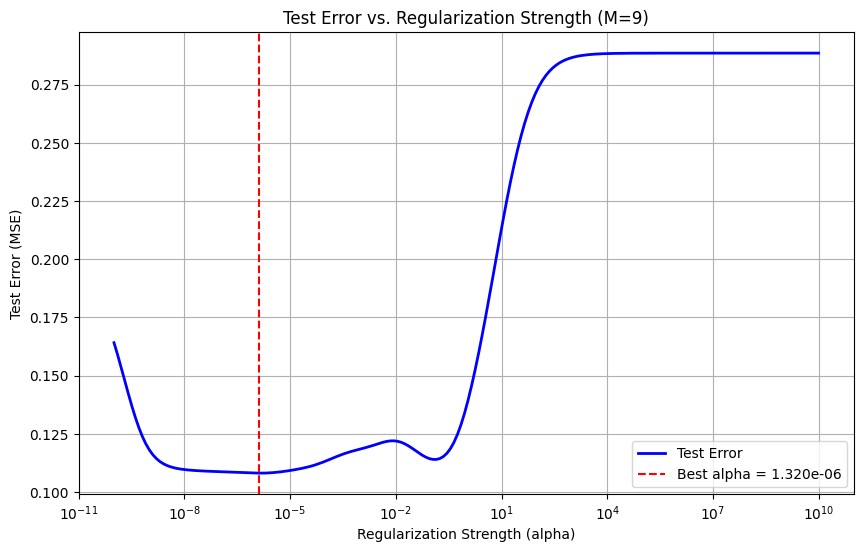

In [16]:
from sklearn.metrics import mean_squared_error

overfit_M = 9
print(f" M overfit : {overfit_M}")


alpha_values = np.logspace(-10, 10, 200)
test_errors = []
best_alpha = None
min_test_error = np.inf
best_w_star = None

for alpha in alpha_values:
    Phi_train = np.vstack([x_train**m for m in range(overfit_M + 1)]).T 
    Phi_test = np.vstack([x**m for m in range(overfit_M + 1)]).T         
    
    I = np.eye(Phi_train.shape[1]) 
    w_star_map = np.linalg.inv(Phi_train.T @ Phi_train + alpha * I) @ Phi_train.T @ t_train 
    
    t_test_pred = Phi_test @ w_star_map  
    test_error = mean_squared_error(t_true, t_test_pred)
    
    test_errors.append(test_error)
    
    if test_error < min_test_error:
        min_test_error = test_error
        best_alpha = alpha
        best_w_star = w_star_map

print(f"\nBest alpha: {best_alpha:.3e}")
print(f"Minimum test error: {min_test_error:.4f}")
print(f"Optimal weights w* for alpha={best_alpha:.3e}:")
print(np.round(best_w_star, 3))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, test_errors, label="Test Error", color="blue", linewidth=2)
plt.xscale('log')  
plt.xlabel("Regularization Strength (alpha)")
plt.ylabel("Test Error (MSE)")
plt.title(f"Test Error vs. Regularization Strength (M={overfit_M})")
plt.axvline(best_alpha, color="red", linestyle="--", label=f"Best alpha = {best_alpha:.3e}")
plt.legend()
plt.grid(True)
plt.show()

PART-4

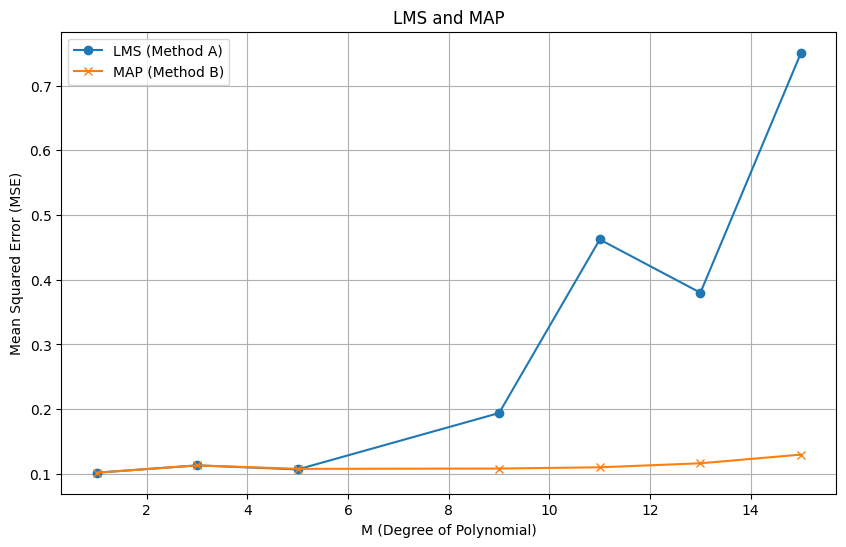

In [17]:
mse_ols = []
for M in M_values:
    Phi_train = np.vstack([x_train**m for m in range(M+1)]).T 
    w_star_ols = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train
    Phi_test = np.vstack([x**m for m in range(M+1)]).T 
    t_test_pred_ols = Phi_test @ w_star_ols
    mse_ols.append(mean_squared_error(t_true, t_test_pred_ols))

mse_map = []
for M in M_values:
    Phi_train = np.vstack([x_train**m for m in range(M+1)]).T
    Phi_test =np.vstack([x**m for m in range(M+1)]).T

    I = np.eye(Phi_train.shape[1])
    w_star_map = np.linalg.inv(Phi_train.T @ Phi_train + best_alpha * I) @ Phi_train.T @ t_train
    t_test_pred_map = Phi_test @ w_star_map
    mse_map.append(mean_squared_error(t_true, t_test_pred_map))

plt.figure(figsize=(10, 6))
plt.plot(M_values, mse_ols, label="LMS (Method A)", marker='o')
plt.plot(M_values, mse_map, label="MAP (Method B)", marker='x')
plt.xlabel("M (Degree of Polynomial)")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.title("LMS and MAP")
plt.grid(True)
plt.show()


new

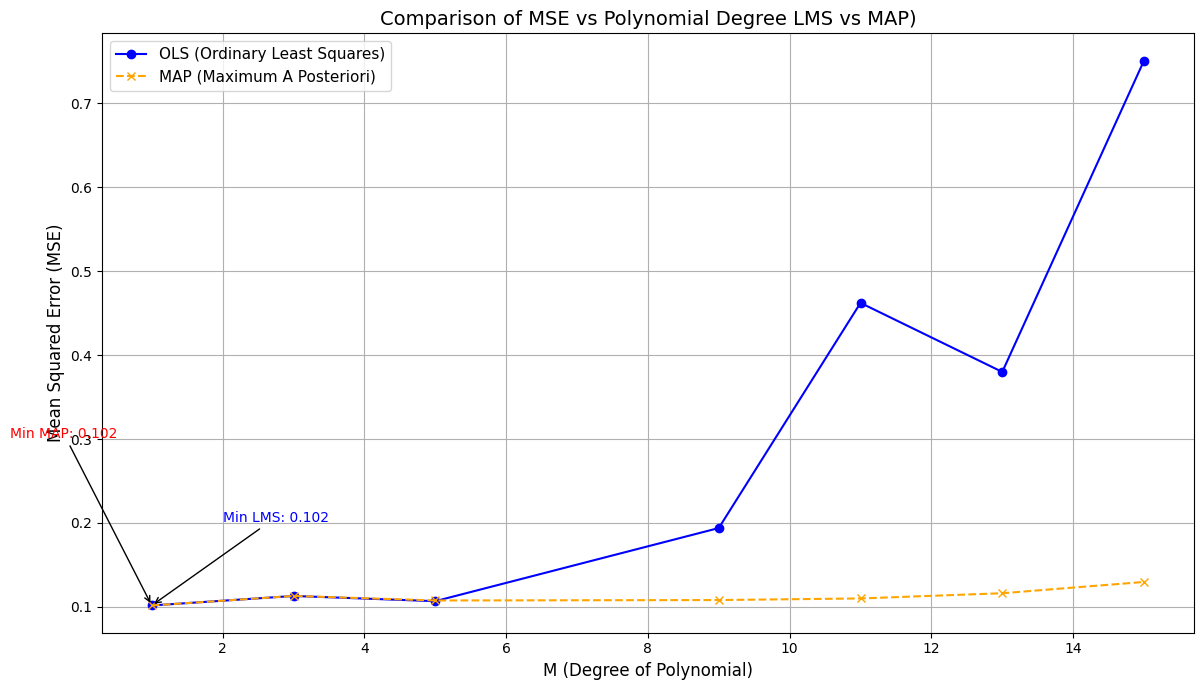

In [18]:
from sklearn.metrics import mean_squared_error

mse_ols = []
mse_map = []

for M in M_values:
    Phi_train = np.vstack([x_train**m for m in range(M + 1)]).T
    w_star_ols = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train
    Phi_test = np.vstack([x**m for m in range(M + 1)]).T
    t_test_pred_ols = Phi_test @ w_star_ols
    mse_ols.append(mean_squared_error(t_true, t_test_pred_ols))
    
    I = np.eye(Phi_train.shape[1])
    w_star_map = np.linalg.inv(Phi_train.T @ Phi_train + best_alpha * I) @ Phi_train.T @ t_train
    t_test_pred_map = Phi_test @ w_star_map
    mse_map.append(mean_squared_error(t_true, t_test_pred_map))

plt.figure(figsize=(12, 7))
plt.plot(M_values, mse_ols, label="OLS (Ordinary Least Squares)", marker='o', linestyle='-', color='blue')
plt.plot(M_values, mse_map, label="MAP (Maximum A Posteriori)", marker='x', linestyle='--', color='orange')

min_mse_ols = min(mse_ols)
min_m_ols = M_values[np.argmin(mse_ols)]
plt.annotate(f"Min LMS: {min_mse_ols:.3f}",
             xy=(min_m_ols, min_mse_ols), 
             xytext=(min_m_ols + 1, min_mse_ols + 0.1),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), 
             fontsize=10, color='blue')

min_mse_map = min(mse_map)
min_m_map = M_values[np.argmin(mse_map)]
plt.annotate(f"Min MAP: {min_mse_map:.3f}",
             xy=(min_m_map, min_mse_map), 
             xytext=(min_m_map - 2, min_mse_map + 0.2),
             arrowprops=dict(facecolor='red', arrowstyle='->'), 
             fontsize=10, color='red')

plt.xlabel("M (Degree of Polynomial)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Comparison of MSE vs Polynomial Degree LMS vs MAP)", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True)
plt.tight_layout()

plt.show()

PART-5

Mean Squared Error with Leave-One-Out Cross Validation (LOO): 0.208
Mean Squared Error with Bootstrap Sampling: 0.204


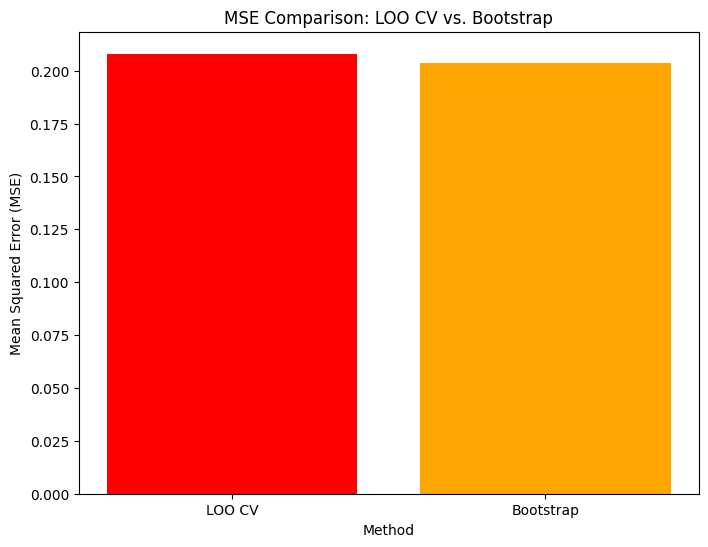

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  KFold, cross_val_score

X = x.reshape(-1, 1)
model = LinearRegression()

loo = KFold(n_splits=len(x), shuffle=False) 
loo_scores = cross_val_score(model, X, t, cv=loo, scoring='neg_mean_squared_error')
mean_loo_mse = -np.mean(loo_scores)

n_bootstrap = 1000  
bootstrap_mse = []  
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(len(x), size=len(x), replace=True)
    X_bootstrap, y_bootstrap = X[bootstrap_indices], t[bootstrap_indices]
    model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = model.predict(X)
    bootstrap_mse.append(mean_squared_error(t, y_pred_bootstrap))  

mean_bootstrap_mse = np.mean(bootstrap_mse)  

print(f"Mean Squared Error with Leave-One-Out Cross Validation (LOO): {mean_loo_mse:.3f}")
print(f"Mean Squared Error with Bootstrap Sampling: {mean_bootstrap_mse:.3f}")

methods = ['LOO CV', 'Bootstrap']  
mse_values = [mean_loo_mse, mean_bootstrap_mse]  

plt.figure(figsize=(8, 6))
plt.bar(methods, mse_values, color=['red', 'orange'])  
plt.xlabel('Method')  
plt.ylabel('Mean Squared Error (MSE)') 
plt.title('MSE Comparison: LOO CV vs. Bootstrap')  
plt.show()  